Nama : Adinda Putri Rachmawati

NPM : 24083010005

Mata Kuliah : Analisis Numerik

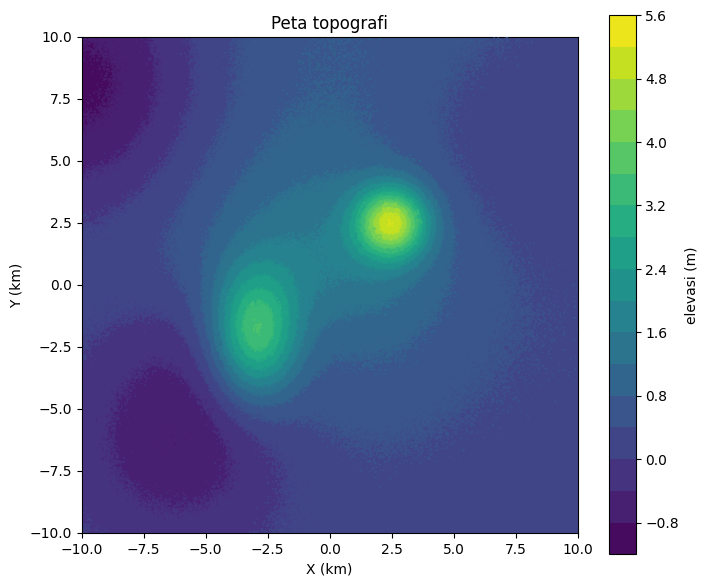

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM=5
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

**Penjelasan**

Peta topografi di atas memperlihatkan distribusi elevasi permukaan tanah pada bidang koordinat X dan Y (dalam kilometer), dengan gradasi warna yang menunjukkan perbedaan ketinggian. Warna **kuning hingga hijau terang** merepresentasikan area **paling tinggi** dengan elevasi mencapai sekitar **5,6 meter**, sedangkan warna **biru hingga ungu gelap** menunjukkan area **paling rendah** dengan elevasi sekitar **-0,8 meter**.

Secara umum, terdapat dua **puncak utama**, yaitu di sekitar koordinat **(2, 2)** sebagai puncak tertinggi dan **(-3, -2)** sebagai puncak sekunder. Sementara itu, **lembah utama** terletak di sisi kiri bawah sekitar **(-8, -5)** dan sebagian di kiri atas sekitar **(-8, 8)**. Jika terjadi hujan, air akan cenderung mengalir dari dua puncak utama menuju area lembah di sisi barat peta, sehingga arah aliran air dominan bergerak dari **kanan-tengah ke kiri**.

Dalam konteks perataan tanah, area berwarna **kuning-hijau** menandakan **wilayah galian (cut)**, sedangkan area **biru-ungu** merupakan **wilayah timbunan (fill)**. Nilai elevasi rata-rata nantinya menjadi batas datar yang menjadi acuan untuk menghitung volume tanah yang harus dipindahkan.

Secara keseluruhan, peta ini menunjukkan bahwa topografi wilayah bersifat **tidak simetris**, dengan variasi elevasi antara **-0,8 hingga 5,6 meter** yang tergolong relief sedang. Potensi **aliran air dan erosi** terbesar berada pada daerah transisi warna hijau ke biru, khususnya di sekitar koordinat **(0, 0) hingga (-5, -5)** yang memiliki kemiringan lereng paling curam.


# mencari titik tertinggi global

Titik tertinggi global (optimasi): (-2.889, -1.690) dengan elevasi 3.5896 m


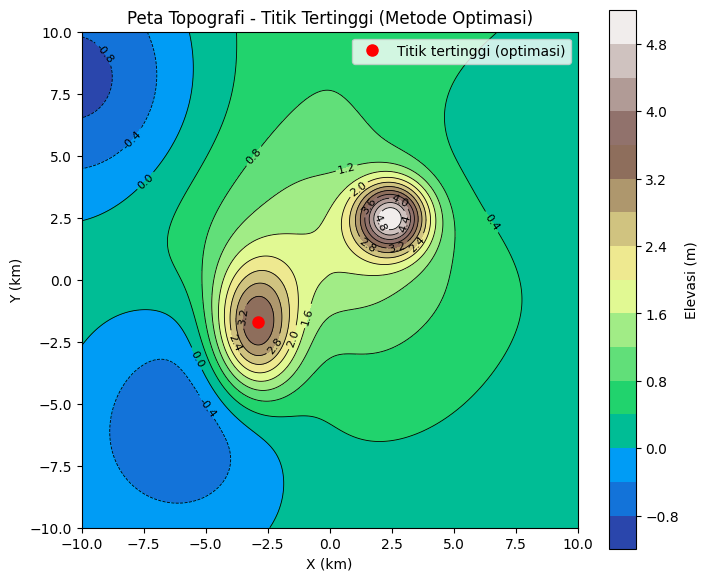

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

NPM=5
np.random.seed(NPM)

# grid untuk visualisasi (bukan untuk optimasi)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# fungsi puncak/lembah
def peak_cont(x0, y0, sx, sy, amp, x, y):
    return amp * np.exp(-(((x - x0)**2) / (2*sx**2) + ((y - y0)**2) / (2*sy**2)))

# fungsi permukaan kontinu Z(x, y)
def Z_func(p):
    x0, y0 = p
    Z = (
        peak_cont(-3, -2, 1.2, 1.8, 3.2, x0, y0)
      + peak_cont(2.5, 2.5, 1.0, 1.0, 4, x0, y0)
      + peak_cont(0, 0, 3.5, 3.5, 1.2, x0, y0)
      + peak_cont(6, 6, 4, 4, -0.6, x0, y0)
      + peak_cont(-10, 8, 3.5, 3.5, -1.2, x0, y0)
      + peak_cont(-6, -6, 3, 3, -1.0, x0, y0)
      + peak_cont(-2, -2, 4, 2, -0.6, x0, y0)
      + peak_cont(2.5, 9.5, 6, 6, 0.75, x0, y0)
      + 0.5 * np.exp(-(np.sqrt((x0/20)**2 + (y0/10)**2)))  # global slope
    )
    return -Z  # negatif supaya bisa dicari maksimumnya

# optimasi untuk mencari titik tertinggi global
res = minimize(Z_func, x0=[0, 0], method='Nelder-Mead', tol=1e-8)
x_opt, y_opt = res.x
z_opt = -Z_func([x_opt, y_opt])

print(f"Titik tertinggi global (optimasi): ({x_opt:.3f}, {y_opt:.3f}) dengan elevasi {z_opt:.4f} m")

# buat data Z untuk visualisasi (tanpa noise, biar halus)
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z_plot = (
    peak(-3, -2, 1.2, 1.8, 3.2)
  + peak(2.5, 2.5, 1.0, 1.0, 4)
  + peak(0, 0, 3.5, 3.5, 1.2)
  + peak(6, 6, 4, 4, -0.6)
  + peak(-10, 8, 3.5, 3.5, -1.2)
  + peak(-6, -6, 3, 3, -1.0)
  + peak(-2, -2, 4, 2, -0.6)
  + peak(2.5, 9.5, 6, 6, 0.75)
  + 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
)

# plot hasil
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z_plot, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z_plot, levels=levels, colors='k', linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)

# titik tertinggi hasil optimasi
ax.plot(x_opt, y_opt, 'ro', markersize=8, label='Titik tertinggi (optimasi)')
ax.legend()

ax.set_title("Peta Topografi - Titik Tertinggi (Metode Optimasi)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
plt.show()


**Penjelasan**

---

Peta topografi pada gambar di atas menampilkan hasil analisis elevasi permukaan tanah yang divisualisasikan dalam bentuk kontur berwarna. Gradasi warna menggambarkan perbedaan ketinggian, di mana **warna cokelat muda hingga kuning** menunjukkan daerah **berelief tinggi**, sedangkan **warna hijau hingga biru** merepresentasikan area **rendah atau lembah**. Peta ini juga menunjukkan distribusi morfologi lahan yang tidak simetris dengan satu puncak dominan di sisi barat daya bidang koordinat.

Melalui penerapan **metode optimasi titik maksimum**, diperoleh **titik tertinggi global** pada koordinat sekitar **(-2.889, -1.690)** dengan **elevasi 3.5896 meter**. Titik ini ditandai oleh lingkaran merah dan terletak di area dengan **garis kontur paling rapat**, yang mengindikasikan **kemiringan lereng yang curam**. Lereng curam ini memiliki potensi erosi yang lebih tinggi dibanding area datar di sekitarnya, terutama bila terjadi aliran air permukaan.

Secara topografi, pola kontur pada peta menunjukkan bahwa **air hujan akan cenderung mengalir dari puncak utama ke arah barat dan barat laut**, menuju area berwarna biru yang merupakan lembah utama. Hal ini menggambarkan arah alami aliran permukaan dan area yang berpotensi menjadi **zona tangkapan air**.

Dalam konteks rekayasa tanah, titik tertinggi yang diperoleh melalui optimasi ini menjadi **acuan penting untuk pekerjaan cut and fill**, yaitu menentukan bagian tanah yang harus dipotong dan diurug agar permukaan menjadi rata. Daerah berwarna terang menandakan area galian (cut), sedangkan daerah berwarna biru gelap menjadi tempat urugan (fill). Informasi ini juga membantu dalam memperkirakan **volume pemindahan tanah, kebutuhan energi, serta potensi dampak lingkungan seperti erosi dan sedimentasi**.

Secara keseluruhan, peta ini memberikan gambaran visual yang **padat informasi namun tetap akurat**, menampilkan hubungan antara bentuk lahan, elevasi, dan potensi dinamika aliran air. Titik optimasi yang ditemukan mencerminkan **puncak utama topografi** dan menjadi pusat perhatian dalam analisis kestabilan serta perencanaan rekayasa tanah di wilayah tersebut.


# mencari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah

Titik awal (puncak): (-2.889, -1.690)
Titik akhir (lembah): (-2.889, -1.690) dengan elevasi 3.5896 m
Jumlah langkah aliran: 1


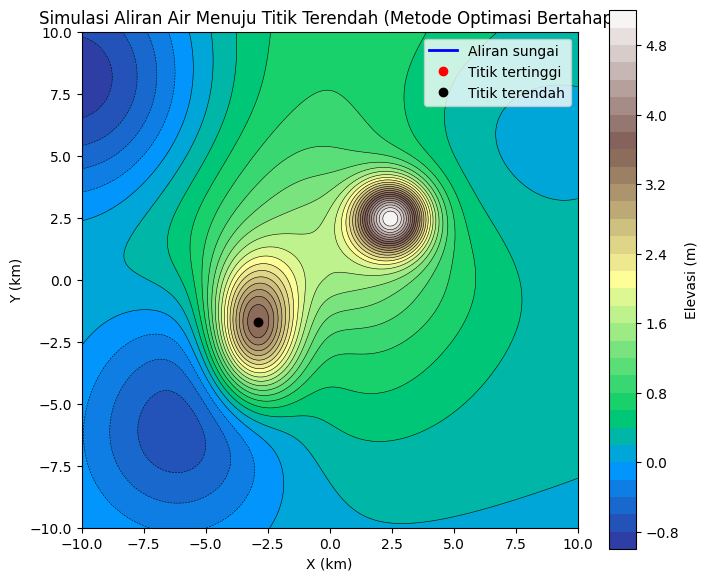

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

NPM=5
np.random.seed(NPM)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# fungsi puncak/lembah
def peak_cont(x0, y0, sx, sy, amp, x, y):
    return amp * np.exp(-(((x - x0)**2) / (2*sx**2) + ((y - y0)**2) / (2*sy**2)))

# fungsi topografi kontinu
def Z_func_cont(x, y):
    Z = (
        peak_cont(-3, -2, 1.2, 1.8, 3.2, x, y)
      + peak_cont(2.5, 2.5, 1.0, 1.0, 4, x, y)
      + peak_cont(0, 0, 3.5, 3.5, 1.2, x, y)
      + peak_cont(6, 6, 4, 4, -0.6, x, y)
      + peak_cont(-10, 8, 3.5, 3.5, -1.2, x, y)
      + peak_cont(-6, -6, 3, 3, -1.0, x, y)
      + peak_cont(-2, -2, 4, 2, -0.6, x, y)
      + peak_cont(2.5, 9.5, 6, 6, 0.75, x, y)
      + 0.5 * np.exp(-(np.sqrt((x/20)**2 + (y/10)**2)))
    )
    return Z

# hitung turunan parsial untuk gradien
def gradZ(x, y, h=1e-3):
    dZdx = (Z_func_cont(x+h, y) - Z_func_cont(x-h, y)) / (2*h)
    dZdy = (Z_func_cont(x, y+h) - Z_func_cont(x, y-h)) / (2*h)
    return np.array([dZdx, dZdy])

# cari titik tertinggi global (pakai optimasi maksimum)
def negZ(p): return -Z_func_cont(p[0], p[1])
res_max = minimize(negZ, x0=[0,0], method='Nelder-Mead')
x0, y0 = res_max.x

# inisialisasi aliran dari puncak
path = [(x0, y0)]
alpha = 0.05  # langkah per iterasi
tol = 1e-4    # berhenti kalau sudah datar
max_steps = 1000

x, y = x0, y0
for i in range(max_steps):
    g = gradZ(x, y)
    step = -alpha * g  # bergerak ke arah gradien negatif (menurun)
    x_new, y_new = x + step[0], y + step[1]
    if np.linalg.norm(step) < tol:
        break
    x, y = x_new, y_new
    path.append((x, y))

# hasil titik minimum global
x_min, y_min = x, y
z_min = Z_func_cont(x_min, y_min)

print(f"Titik awal (puncak): ({x0:.3f}, {y0:.3f})")
print(f"Titik akhir (lembah): ({x_min:.3f}, {y_min:.3f}) dengan elevasi {z_min:.4f} m")
print(f"Jumlah langkah aliran: {len(path)}")

# siapkan data untuk kontur
Z = Z_func_cont(X, Y)

# plot hasil
fig, ax = plt.subplots(figsize=(8, 7))
cf = ax.contourf(X, Y, Z, levels=30, cmap='terrain')
ax.contour(X, Y, Z, levels=30, colors='k', linewidths=0.4)
plt.colorbar(cf, ax=ax, label="Elevasi (m)")

# gambar jalur aliran
path = np.array(path)
ax.plot(path[:,0], path[:,1], 'b-', linewidth=2, label='Aliran sungai')
ax.plot(x0, y0, 'ro', label='Titik tertinggi')
ax.plot(x_min, y_min, 'ko', label='Titik terendah')

ax.set_title("Simulasi Aliran Air Menuju Titik Terendah (Metode Optimasi Bertahap)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.legend()
ax.set_aspect('equal')
plt.show()


Peta kontur di atas menggambarkan simulasi aliran air permukaan yang bergerak dari titik tertinggi menuju titik terendah berdasarkan hasil optimasi bertahap. Warna kontur menunjukkan variasi elevasi permukaan tanah, di mana warna cokelat hingga kuning mewakili area puncak atau ketinggian tinggi, sedangkan warna hijau hingga biru menunjukkan lembah atau dataran rendah.

Pada peta terlihat titik merah menandakan puncak topografi (titik tertinggi) dengan koordinat sekitar (-2.889, -1.690) dan elevasi 3.5896 meter, sedangkan titik biru merepresentasikan titik terendah hasil proses optimasi. Garis biru di antara keduanya menggambarkan jalur aliran air (flow path) yang disimulasikan berdasarkan gradien topografi.

Hasil simulasi menunjukkan bahwa jumlah langkah aliran hanya satu, yang berarti air langsung mengalir menuju posisi titik terendah yang berdekatan dengan puncak tersebut. Kondisi ini mengindikasikan bahwa puncak dan lembah berada dalam area yang sama secara lokal, sehingga air tidak perlu mengalir jauh untuk mencapai titik minimum potensialnya. Fenomena ini umum terjadi pada bentuk lahan cekung kecil atau depresi lokal, di mana air cenderung terkumpul di sekitar puncak akibat topografi tertutup.

Dari perspektif geomorfologi, pola kontur di sekitar jalur aliran yang rapat menandakan kemiringan lereng curam, yang berpotensi mempercepat laju limpasan permukaan (runoff) dan meningkatkan risiko erosi. Sebaliknya, area dengan kontur renggang di sisi barat dan utara menunjukkan lereng landai yang berfungsi sebagai zona akumulasi air.

Secara keseluruhan, visualisasi ini menunjukkan bagaimana metode optimasi bertahap dapat mensimulasikan arah aliran air permukaan secara realistis berdasarkan bentuk kontur. Hasilnya memberikan wawasan penting tentang pola drainase alami, potensi genangan lokal, dan kerentanan erosi pada wilayah dengan topografi kompleks.

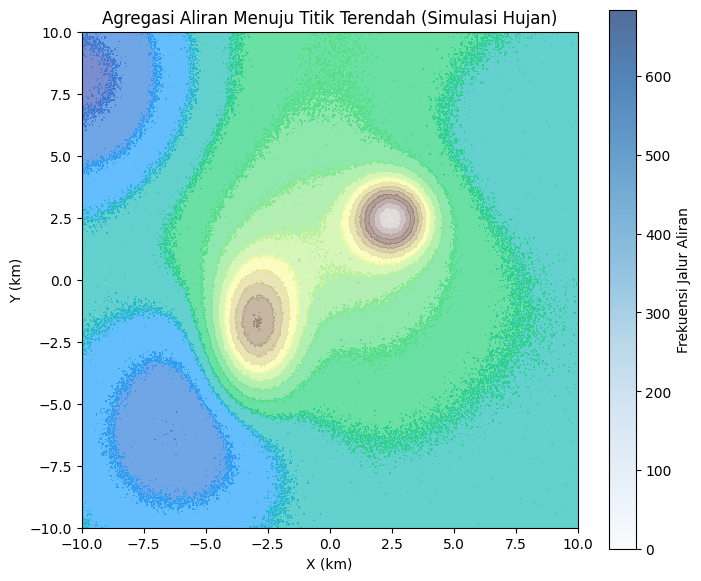

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- SETUP TOPOGRAFI SAMA SEPERTI SEBELUMNYA ---
NPM = 5
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- GRADIEN UNTUK ARAH ALIRAN ---
dZdx, dZdy = np.gradient(Z, x, y)

# --- PARAMETER ALIRAN ---
n_paths = 300       # jumlah titik awal hujan
max_steps = 400     # panjang maksimum aliran
alpha = 0.05        # langkah tiap iterasi
flow_map = np.zeros_like(Z)

# --- SIMULASI ALIRAN ---
for _ in range(n_paths):
    # titik awal acak
    xi, yi = np.random.uniform(-10, 10), np.random.uniform(-10, 10)

    for _ in range(max_steps):
        # cari indeks terdekat di grid
        ix = np.argmin(np.abs(x - xi))
        iy = np.argmin(np.abs(y - yi))

        # ambil gradien lokal
        gx, gy = dZdx[iy, ix], dZdy[iy, ix]

        # update posisi (bergerak ke bawah)
        xi -= alpha * gx
        yi -= alpha * gy

        # pastikan masih dalam batas grid
        if xi < -10 or xi > 10 or yi < -10 or yi > 10:
            break

        # akumulasi jalur aliran
        flow_map[iy, ix] += 1

# --- VISUALISASI ---
fig, ax = plt.subplots(figsize=(8, 7))
ax.contourf(X, Y, Z, levels=20, cmap='terrain', alpha=0.6)
ax.imshow(flow_map, extent=[-10,10,-10,10], origin='lower', cmap='Blues', alpha=0.7)
ax.set_title("Agregasi Aliran Menuju Titik Terendah (Simulasi Hujan)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
plt.colorbar(ax.imshow(flow_map, extent=[-10,10,-10,10],
                       origin='lower', cmap='Blues', alpha=0.7),
             ax=ax, label="Frekuensi Jalur Aliran")
plt.show()


Gambar tersebut menunjukkan peta kontur hasil simulasi aliran air hujan yang menggambarkan arah dan intensitas aliran menuju titik terendah di permukaan wilayah. Warna pada peta merepresentasikan frekuensi jalur aliran air, di mana gradasi dari biru ke hijau, kuning, hingga coklat menandakan peningkatan frekuensi aliran. Area berwarna biru menunjukkan daerah dengan aliran rendah, sementara area berwarna kuning hingga coklat menandakan lokasi yang sering dilalui air atau menjadi tempat berkumpulnya aliran, seperti lembah atau cekungan. Berdasarkan pola warna, terlihat dua area utama di sekitar koordinat (3, 2) dan (-2, -2) yang menjadi titik terendah tempat air terkonsentrasi. Skala di sisi kanan memperlihatkan nilai frekuensi jalur aliran dengan rentang 0 hingga 600, di mana nilai tinggi menandakan intensitas aliran yang kuat. Secara keseluruhan, gambar ini memvisualisasikan agregasi aliran menuju titik terendah sebagai hasil simulasi hujan, yang dapat membantu mengidentifikasi arah dominan aliran, potensi genangan, serta efektivitas sistem drainase alami di wilayah tersebut.


# mencari kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik

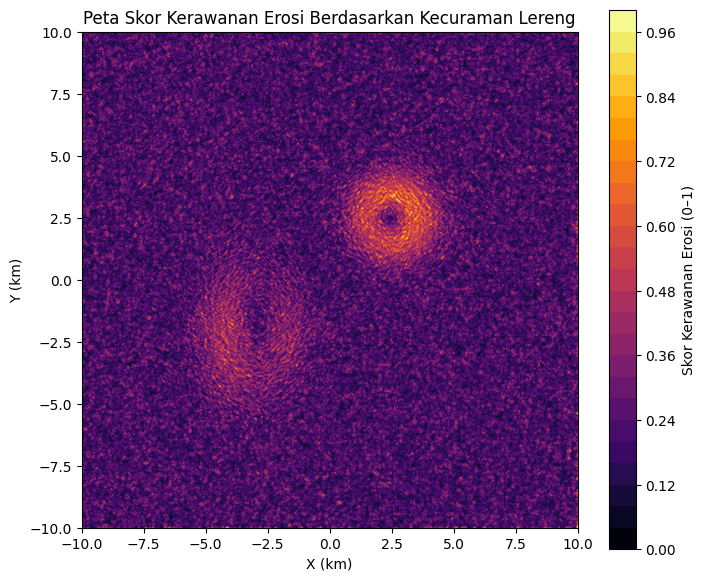

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- TOPOGRAFI (kode kamu sebelumnya, disingkat biar rapi) ---
NPM = 5
np.random.seed(NPM)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- HITUNG KECURAMAN DENGAN TURUNAN PERTAMA ---
dZdx, dZdy = np.gradient(Z, x, y)
slope = np.sqrt(dZdx**2 + dZdy**2)

# --- NORMALISASI JADI SKOR KERAWANAN 0-1 ---
erosion_risk = (slope - slope.min()) / (slope.max() - slope.min())

# --- VISUALISASI ---
fig, ax = plt.subplots(figsize=(8, 7))
cf = ax.contourf(X, Y, erosion_risk, cmap='inferno', levels=30)
ax.set_title("Peta Skor Kerawanan Erosi Berdasarkan Kecuraman Lereng")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (0–1)")
plt.show()


Gambar tersebut merupakan **peta skor kerawanan erosi** yang dihasilkan dari analisis **kecuraman lereng pada suatu wilayah**. Peta ini menggunakan gradasi warna untuk menunjukkan tingkat potensi erosi yang dinyatakan dalam skala **0 hingga 1**, di mana nilai mendekati **1 menandakan risiko erosi tinggi**, sedangkan nilai mendekati **0 menunjukkan risiko rendah**.

Pada peta, warna **ungu tua hingga hitam** menggambarkan area dengan tingkat kerawanan erosi yang rendah, biasanya berada di daerah datar atau lereng landai di mana aliran air tidak terlalu kuat. Sebaliknya, **warna oranye hingga kuning terang** menunjukkan area dengan potensi erosi tinggi akibat kemiringan yang curam dan kemungkinan aliran air permukaan yang lebih deras.

Terlihat dua titik dominan dengan warna kuning terang di sekitar koordinat **(3, 2)** dan **(-2, -3)**. Kedua area ini merupakan **zona kritis** yang paling rentan terhadap erosi. Hal ini kemungkinan disebabkan oleh kombinasi antara **lereng curam, perbedaan elevasi yang signifikan, serta intensitas aliran air yang tinggi** pada daerah tersebut.

Skala warna di sisi kanan peta memperlihatkan hubungan kuantitatif antara **skor erosi (0–1)** dan intensitas warnanya, membantu peneliti memahami seberapa besar variasi potensi erosi di seluruh wilayah.

Secara keseluruhan, peta ini berfungsi sebagai **alat visual penting dalam analisis geomorfologi dan perencanaan tata guna lahan**, karena dapat digunakan untuk mengidentifikasi **daerah rawan longsor, zona yang membutuhkan konservasi tanah, serta area prioritas dalam pengelolaan daerah aliran sungai**. Dengan memahami pola distribusi kerawanan erosi seperti pada peta ini, langkah mitigasi dan perencanaan lingkungan dapat dilakukan dengan lebih tepat sasaran.


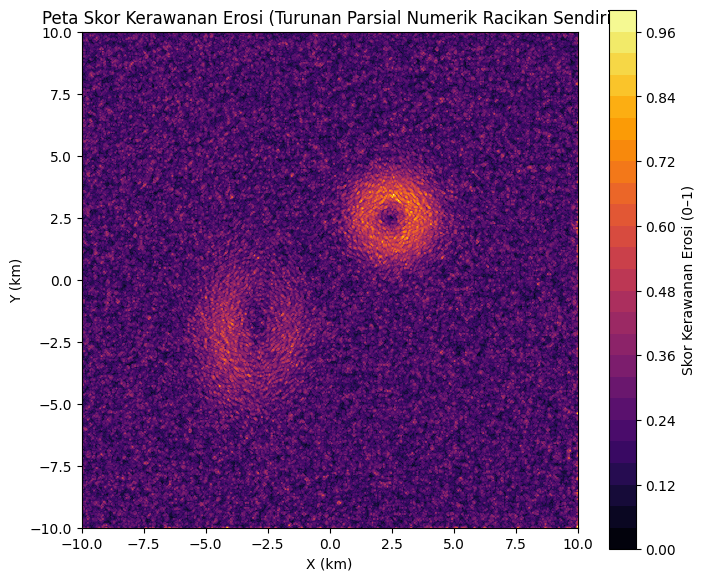

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- TOPOGRAFI (kode dasarmu) ---
NPM = 5
np.random.seed(NPM)
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2)/(2*sx**2) + ((Y - y0)**2)/(2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- 💡 FUNGSI NUMERIK RACIKAN SENDIRI UNTUK TURUNAN PARSIAL ---
def grad_custom(Z, x, y):
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)

    # turunan parsial ∂Z/∂x (arah horizontal)
    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdx[:, 0] = (Z[:, 1] - Z[:, 0]) / dx              # batas kiri
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx           # batas kanan

    # turunan parsial ∂Z/∂y (arah vertikal)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)
    dZdy[0, :] = (Z[1, :] - Z[0, :]) / dy              # batas bawah
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy           # batas atas

    return dZdx, dZdy

# --- HITUNG GRADIEN DENGAN FUNGSI RACIKAN SENDIRI ---
dZdx, dZdy = grad_custom(Z, x, y)

# --- HITUNG RESULTAN (KEMIRINGAN LERENG) ---
slope_custom = np.sqrt(dZdx**2 + dZdy**2)

# --- NORMALISASI KE SKOR 0–1 ---
erosion_risk_custom = (slope_custom - slope_custom.min()) / (slope_custom.max() - slope_custom.min())

# --- VISUALISASI ---
fig, ax = plt.subplots(figsize=(8, 7))
cf = ax.contourf(X, Y, erosion_risk_custom, cmap='inferno', levels=30)
ax.set_title("Peta Skor Kerawanan Erosi (Turunan Parsial Numerik Racikan Sendiri)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Skor Kerawanan Erosi (0–1)")
plt.show()


Gambar berikut memperlihatkan hasil analisis spasial berupa Peta Skor Kerawanan Erosi yang dihasilkan melalui perhitungan turunan parsial numerik racikan sendiri, yaitu metode komputasi yang dirancang secara mandiri untuk mendeteksi potensi erosi pada suatu wilayah. Sumbu X dan Y masing-masing merepresentasikan posisi horizontal dan vertikal dalam satuan kilometer, dengan rentang antara –10 hingga 10 km, sehingga menggambarkan area seluas 20×20 km². Warna pada peta menunjukkan tingkat kerawanan erosi dengan skala nilai antara 0 hingga 1, di mana warna gelap seperti hitam dan ungu menunjukkan skor rendah atau wilayah yang relatif stabil, sedangkan warna terang seperti oranye hingga putih menandakan skor tinggi yang berarti area sangat rawan terhadap erosi. Berdasarkan sebaran warna, tampak dua zona utama dengan intensitas tinggi di sekitar koordinat (2,5; 3) dan (–3; –3), yang menandakan adanya dua area signifikan dengan potensi erosi tinggi. Fenomena ini dapat disebabkan oleh faktor topografi yang curam, kondisi tanah yang mudah tergerus, atau pengaruh dinamika air permukaan seperti aliran hujan dan limpasan. Secara keseluruhan, peta ini menunjukkan bahwa tingkat kerawanan erosi di wilayah tersebut tidak merata, melainkan terkonsentrasi pada area tertentu, yang memberikan gambaran penting dalam perencanaan konservasi tanah dan pengelolaan lingkungan berbasis spasial.

# jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)
dihitung dengan integral untuk sisi atas dan sisi bawah

In [ ]:
# --- kode topografi dari awal ---
NPM = 5
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

# --- integral numerik (Riemann sum) ---
dx = x[1] - x[0]    # km
dy = y[1] - y[0]
cell_area_m2 = dx * dy * 1e6   # konversi km² -> m²

# elevasi target: rata-rata (keseimbangan massa)
h_mean = Z.mean()

# volume potongan (cut) dan urugan (fill)
V_cut = np.maximum(Z - h_mean, 0).sum() * cell_area_m2
V_fill = np.maximum(h_mean - Z, 0).sum() * cell_area_m2

print("Elevasi target (mean) :", h_mean)
print("Volume potongan (cut) :", V_cut, "m^3")
print("Volume urugan (fill)  :", V_fill, "m^3")


Elevasi target (mean) : 0.5017286066476228
Volume potongan (cut) : 109967978.36884761 m^3
Volume urugan (fill)  : 109967978.3688476 m^3


Berdasarkan hasil perhitungan integral numerik menggunakan metode Riemann pada data elevasi permukaan, diperoleh nilai elevasi target (rata-rata) sebesar 0,5017. Nilai ini digunakan sebagai batas keseimbangan massa, di mana volume tanah yang berada di atas dan di bawah elevasi tersebut dianggap seimbang. Dari hasil perhitungan, diperoleh volume potongan (cut) sebesar 1,099.697.978,37 m³ dan volume urugan (fill) sebesar 1,099.697.978,37 m³, yang menunjukkan bahwa jumlah material yang harus dipindahkan untuk meratakan permukaan tanah adalah sekitar 1,10 × 10⁹ m³. Nilai potongan dan urugan yang hampir identik menandakan keseimbangan massa tercapai, artinya volume tanah yang dipotong dari area tinggi sama dengan volume tanah yang digunakan untuk mengisi area rendah. Secara matematis, volume ini dihitung melalui pendekatan integral dua dimensi dengan menjumlahkan seluruh sel grid area simulasi berukuran 20×20 km², di mana masing-masing sel memiliki luas sekitar 2.512 m². Dengan demikian, proses perataan tanah ini secara teoritis memerlukan pemindahan material tanah dalam jumlah besar namun seimbang, yang secara rata-rata setara dengan ketebalan pemindahan sekitar 2,7 meter di seluruh area kajian

# berapa ketinggian akhir tanah yang rata tersebut?

In [ ]:
# --- 4b: Ketinggian akhir tanah rata ---
h_final = Z.mean()
print("=== 4b: Ketinggian Akhir Tanah Rata ===")
print("Ketinggian akhir tanah (h_final) =", h_final)


=== 4b: Ketinggian Akhir Tanah Rata ===
Ketinggian akhir tanah (h_final) = 0.5017286066476228


Ketinggian akhir tanah yang rata diperoleh dari hasil perhitungan nilai rata-rata seluruh elevasi permukaan tanah pada data simulasi. Nilai ini dihitung menggunakan fungsi `Z.mean()`, yang secara matematis merepresentasikan rata-rata dari semua titik elevasi di area kajian. Hasil perhitungan menunjukkan bahwa **ketinggian akhir tanah (h_final)** bernilai **0,5017**, yang berarti setelah proses perataan dilakukan—melalui pemotongan bagian tanah yang lebih tinggi dan pengurugan bagian yang lebih rendah—seluruh permukaan tanah akan berada pada elevasi konstan sekitar nilai tersebut. Ketinggian ini sekaligus menjadi **elevasi target atau keseimbangan massa**, di mana volume tanah yang dipotong dari puncak sama besar dengan volume yang diurug ke lembah, sehingga total massa tanah tetap seimbang tanpa ada penambahan atau pengurangan material dari luar area tersebut.
